In [ ]:
#---------------------SOCIAL MEDIA INFLUENCE ANALYSIS---------------------
#---------------------INFANT FEEDING AND SOCIAL MEDIA SENTIMENT ANALYSIS---------------------
#---------------------DATA SCIENCE---------------------

In [1]:

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import plotly.express as px
import matplotlib.pyplot as plt
import re


import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))



/kaggle/input/breastfeeding-wsentiment/dfSentiment.csv
/kaggle/input/infant-feeding/Breastfeeding_3months_.csv
/kaggle/input/infant-feeding/Breastfeeding_3months.xlsx
/kaggle/input/infant-feeding/FormulaMilk_3months_.csv
/kaggle/input/infant-feeding/FormulaMilk_3months.xlsx


In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
df = pd.read_csv('../input/infant-feeding/Breastfeeding_3months_.csv')

# Quick data lookup

In [4]:
df.head()

status_id               created_at  \
0  1538941385809747968  2022-06-20 17:46:33 UTC   
1  1538941854649032705  2022-06-20 17:48:24 UTC   
2  1538942219645861892  2022-06-20 17:49:51 UTC   
3  1538942452723335169  2022-06-20 17:50:47 UTC   
4  1538942645011030016  2022-06-20 17:51:33 UTC   

                                                text  display_text_width  \
0  Manic Mondays ☕\n\nFrom the 16th century onwar...                 140   
1  southern softie commented on MailOnline: What ...                 196   
2  MomToBe Women’s Rayon Maternity Dress/Easy Bre...                 163   
3  @AlfredMwandagha Good for a breastfeeding bunn...                  33   
4  We know more about cow’s milk than human milk....                 140   

  country     day  
0     NaN  Monday  
1     NaN  Monday  
2     NaN  Monday  
3     NaN  Monday  
4     NaN  Monday

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 238045 entries, 0 to 238044
Data columns (total 6 columns):
 #   Column              Non-Null Count   Dtype 
---  ------              --------------   ----- 
 0   status_id           238045 non-null  int64 
 1   created_at          238045 non-null  object
 2   text                228058 non-null  object
 3   display_text_width  238045 non-null  int64 
 4   country             485 non-null     object
 5   day                 238045 non-null  object
dtypes: int64(2), object(4)
memory usage: 10.9+ MB


In [6]:
df.isna().sum()

status_id                  0
created_at                 0
text                    9987
display_text_width         0
country               237560
day                        0
dtype: int64

# Data preprocessing

In [7]:
type(df.at[0, 'created_at'])

str

## Convert string datetime to datetime format in 'created_at' column

In [8]:
df['created_at'] = pd.to_datetime(df['created_at'])

In [9]:
df['created_at'].head()

0   2022-06-20 17:46:33+00:00
1   2022-06-20 17:48:24+00:00
2   2022-06-20 17:49:51+00:00
3   2022-06-20 17:50:47+00:00
4   2022-06-20 17:51:33+00:00
Name: created_at, dtype: datetime64[ns, UTC]

# Text preprocessing for future use

In [10]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from tqdm import tqdm

[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


### Remove stopwords in English

In [11]:
stopwords = stopwords.words('english')

stopwords.extend(['\xa0', '&gt', 'MailOnline', 'Click&amp', 'amp', 'RT', '2m', 'Ppl', 'gt', 'Much', 'much', 'Yet', 'yet', 'Become', 'become', 'Next', 'next'])

In [12]:
def preprocess_desc(text_col):
    preprocessed_descs = []
    url_pattern = re.compile('http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+')
    tag_pattern = re.compile('@(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+')
    for sentence in tqdm(text_col.values):
        if sentence is np.nan:
            preprocessed_descs.append(sent.lower().strip())
            continue
        else:
            sent = url_pattern.sub('', sentence)
            sent = tag_pattern.sub('', sent)
            sent = sent.replace('\\r', ' ')
            sent = sent.replace('\\"', ' ')
            sent = sent.replace('\\n', ' ')
            sent = re.sub('[^A-Za-z0-9]+', ' ', sent)
            sent = ' '.join(e for e in sent.split() if e not in stopwords)
            preprocessed_descs.append(sent.lower().strip())
    return preprocessed_descs

In [13]:
df = df.assign(pre_text = preprocess_desc(df['text']))

100%|██████████| 238045/238045 [00:17<00:00, 13362.15it/s]


In [14]:
df.drop_duplicates(subset = 'pre_text', inplace = True) # Drop spamming text

In [15]:
df.head()

status_id                created_at  \
0  1538941385809747968 2022-06-20 17:46:33+00:00   
1  1538941854649032705 2022-06-20 17:48:24+00:00   
2  1538942219645861892 2022-06-20 17:49:51+00:00   
3  1538942452723335169 2022-06-20 17:50:47+00:00   
4  1538942645011030016 2022-06-20 17:51:33+00:00   

                                                text  display_text_width  \
0  Manic Mondays ☕\n\nFrom the 16th century onwar...                 140   
1  southern softie commented on MailOnline: What ...                 196   
2  MomToBe Women’s Rayon Maternity Dress/Easy Bre...                 163   
3  @AlfredMwandagha Good for a breastfeeding bunn...                  33   
4  We know more about cow’s milk than human milk....                 140   

  country     day                                           pre_text  
0     NaN  Monday  manic mondays from 16th century onwards charit...  
1     NaN  Monday  southern softie commented what concerning adul...  
2     NaN  Monday  momtobe women rayon maternity dress easy breas...  
3     NaN  Monday                           good breastfeeding bunny  
4     NaN  Monday  we know cow milk human milk but new research m...

## Get countries code for graph ploting

In [16]:
df['country'].unique()

array([nan, 'United States', 'United Kingdom',
       'Republic of the Philippines', 'South Africa', 'Zimbabwe', 'India',
       'Rwanda', 'Canada', 'Ireland', 'Australia', 'Kenya', 'Vietnam',
       'Malaysia', 'East Timor', 'Denmark', 'Nigeria', 'The Netherlands',
       'Italy', 'Pakistan', 'Germany', 'Jamaica', 'Switzerland', 'Norway',
       'Singapore', 'Mexico', 'Indonesia', 'Kingdom of Saudi Arabia',
       'Ghana', 'Uganda', 'Thailand', 'Cyprus', 'Trinidad and Tobago',
       'Botswana', 'Portugal', 'Namibia', 'New Zealand',
       'Republic of Slovenia', 'Ethiopia', 'United Arab Emirates',
       'Maldives', 'Zambia', 'Dominican Republic',
       "People's Republic of China"], dtype=object)

In [17]:
import pycountry
mapping = {country.name: country.alpha_3 for country in pycountry.countries}
mapping_flag = {country.name: country.flag for country in pycountry.countries}

#### Also get flag just for fun =D

### Rename some countries name that cannot get the country code

In [18]:
df['country'].replace(['Republic of the Philippines', 'Vietnam', 'East Timor',
       'The Netherlands', 'Kingdom of Saudi Arabia',
       'Republic of Slovenia', "People's Republic of China"], ['Philippines', 'Viet Nam', 'Timor-Leste', 'Netherlands', 'Saudi Arabia', 'Slovenia', 'China'], regex = True, inplace = True)

In [19]:
df = df.assign(country_code = None)
df = df.assign(country_flag = None)
for index in df.index:
    country = df.at[index, 'country']
    df.at[index, 'country_code'] = mapping.get(country)
    df.at[index, 'country_flag'] = mapping_flag.get(country)

In [20]:
df['country_code'].unique()

array([None, 'USA', 'GBR', 'PHL', 'ZAF', 'ZWE', 'IND', 'RWA', 'CAN',
       'IRL', 'AUS', 'KEN', 'VNM', 'MYS', 'TLS', 'DNK', 'NGA', 'NLD',
       'ITA', 'PAK', 'DEU', 'JAM', 'CHE', 'NOR', 'SGP', 'MEX', 'IDN',
       'SAU', 'GHA', 'UGA', 'THA', 'CYP', 'TTO', 'BWA', 'PRT', 'NAM',
       'NZL', 'SVN', 'ETH', 'ARE', 'MDV', 'ZMB', 'DOM', 'CHN'],
      dtype=object)

In [21]:
df['country_flag'].unique()

array([None, '🇺🇸', '🇬🇧', '🇵🇭', '🇿🇦', '🇿🇼', '🇮🇳', '🇷🇼', '🇨🇦', '🇮🇪', '🇦🇺',
       '🇰🇪', '🇻🇳', '🇲🇾', '🇹🇱', '🇩🇰', '🇳🇬', '🇳🇱', '🇮🇹', '🇵🇰', '🇩🇪', '🇯🇲',
       '🇨🇭', '🇳🇴', '🇸🇬', '🇲🇽', '🇮🇩', '🇸🇦', '🇬🇭', '🇺🇬', '🇹🇭', '🇨🇾', '🇹🇹',
       '🇧🇼', '🇵🇹', '🇳🇦', '🇳🇿', '🇸🇮', '🇪🇹', '🇦🇪', '🇲🇻', '🇿🇲', '🇩🇴', '🇨🇳'],
      dtype=object)

### Looking good! 👀 😎

# Data analysis

## The histogram of the relation between number of post and time within 3 months

In [22]:
fig = px.histogram(df, x = 'created_at')
fig.show()

In [23]:
dfWorldMap = df.groupby(['country', 'country_code', 'country_flag']).size().reset_index(name = 'size')
dfWorldMap.sort_values(by='size', ascending=False ,inplace=True)

In [24]:
dfWorldMap.head()

country country_code country_flag  size
39   United States          USA           🇺🇸   188
38  United Kingdom          GBR           🇬🇧    73
15           Kenya          KEN           🇰🇪    22
31    South Africa          ZAF           🇿🇦    16
10           India          IND           🇮🇳    16

# Global map text posting location within 3 months

In [25]:
fig = px.scatter_geo(dfWorldMap, locations="country_code", color="country",
                     hover_name="country", size="size",
                     projection="natural earth")
fig.show()

# Global map posting location timelines
### From 2022-06 to 2022-07

In [26]:
dfWorldMap2 = df.groupby(['created_at', 'country', 'country_code', 'country_flag']).size().reset_index(name = 'size')
dfWorldMap2.sort_values(by='created_at', ascending=True ,inplace=True)
fig = px.scatter_geo(dfWorldMap2, locations="country_code", color="country",
                     hover_name="country", size="size",
                     animation_frame= dfWorldMap2['created_at'].dt.date,
                     projection="natural earth")
fig.show()

# Popular posting day

In [27]:
dfPie = df.groupby(['day']).size().reset_index(name = 'size')
dfPie.sort_values(by='size', ascending=False ,inplace=True)
fig = px.pie(dfPie, values='size', names='day',
             title='Popular posting day',
             hover_data=['size'])
fig.update_traces(textposition='inside', textinfo='percent+label')
fig.show()

#### Pretty close in everyday

In [28]:
df.text[0]

"Manic Mondays ☕\n\nFrom the 16th century onwards, Charity was often represented as a woman, shown breastfeeding her children. In Van Dyck's version, she is shown with three infants clinging to her, glancing upwards to heaven, the source of her strength: https://t.co/9hPr2e7eNv https://t.co/uzt0GnIKQB"

In [29]:
df['pre_text'] = df['pre_text'].astype(str)

## Remove less frequency words
### --- Skip ---

In [30]:
'''
freq = pd.Series(' '.join(df['pre_text']).split()).value_counts()
less_freq = list(freq[freq ==1].index)
len(less_freq)
'''

"\nfreq = pd.Series(' '.join(df['pre_text']).split()).value_counts()\nless_freq = list(freq[freq ==1].index)\nlen(less_freq)\n"

In [31]:
tqdm.pandas()

### tqdm help me to know the progress because kaggle notebook quite weird somtimes

In [32]:
# dfSample['pre_text'] = dfSample['pre_text'].progress_apply(lambda x: " ".join(x for x in x.split() if x not in less_freq))

## Spelling Correction
### --- Skip this process since it take very long runtime. ---

In [33]:

from textblob import TextBlob, Word, Blobber
#dfSample['pre_text'].progress_apply(lambda x: str(TextBlob(x).correct()))
#dfSample['pre_text'].head()


## Stemming and Lemmatization

In [34]:
from nltk.stem import PorterStemmer

In [35]:
# stemming
'''
st = PorterStemmer()
df['pre_text'] = df['pre_text'].progress_apply(lambda x: " ".join([st.stem(word) for word in x.split()]))
'''

'\nst = PorterStemmer()\ndf[\'pre_text\'] = df[\'pre_text\'].progress_apply(lambda x: " ".join([st.stem(word) for word in x.split()]))\n'

In [36]:
nltk.download('omw-1.4')

[nltk_data] Downloading package omw-1.4 to /usr/share/nltk_data...


True

In [37]:
# lemmatization
df['pre_text'] = df['pre_text'].progress_apply(lambda x: " ".join([Word(word).lemmatize() for word in x.split()]))
df['pre_text'].head()

100%|██████████| 74792/74792 [00:10<00:00, 6875.94it/s]


0    manic monday from 16th century onwards charity...
1    southern softie commented what concerning adul...
2    momtobe woman rayon maternity dress easy breas...
3                             good breastfeeding bunny
4    we know cow milk human milk but new research m...
Name: pre_text, dtype: object

# What people are talking about in 'breastfeeding' tag

# Word cloud

In [38]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

text = " ".join(preText for preText in df.pre_text)

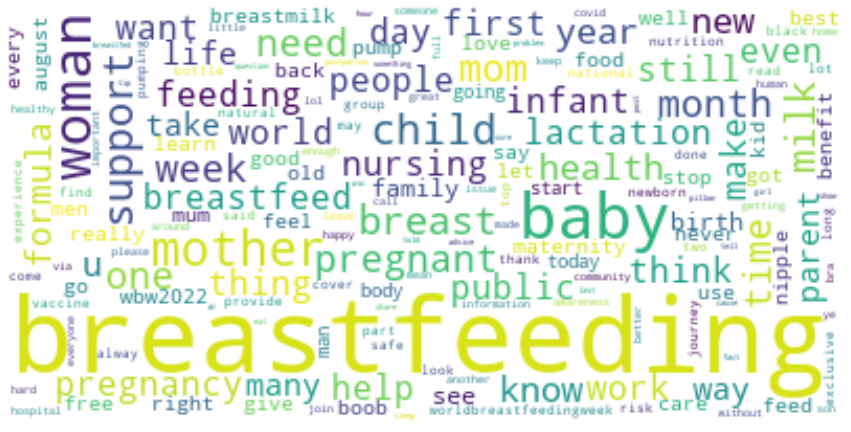

In [39]:
drop_words = ['2m', 'ppl', 'gt', 'much', 'yet', 'become']

stopwords = set(STOPWORDS)
stopwords = stopwords.union(drop_words)
wordcl = WordCloud(stopwords = stopwords, background_color='white', max_font_size = 50, max_words = 5000, collocations = False).generate(text)
plt.figure(figsize=(15, 15))
plt.imshow(wordcl, interpolation='bilinear')
plt.axis('off')
plt.show()

# Word embeddings with word2vec
## Using only words that appear in this dataset only

In [40]:
from gensim.test.utils import common_texts
from gensim.models import Word2Vec,Phrases
import gensim

## Train model

In [41]:
stream_text = [next_text.strip(' ').split(' ') for next_text in df['pre_text']]

w2v_model = gensim.models.Word2Vec(stream_text, min_count = 1, vector_size = 400, workers = 4, window = 3, sg = 0)

## Each word will be represented as n-dimensions vector.

In [42]:
w2v_model.wv['pregnant'].shape

(400,)

# t-SNE visualization

In [43]:
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
import seaborn as sns
sns.set_style("darkgrid")

In [44]:
def tsne_plot(for_word, w2v_model):
    # trained word2vec model dimention
    dim_size = w2v_model.wv.vectors.shape[1]

    arrays = np.empty((0, dim_size), dtype='f')
    word_labels = [for_word]
    color_list  = ['red']

    # adds the vector of the query word
    arrays = np.append(arrays, w2v_model.wv.__getitem__([for_word]), axis=0)

    # gets list of most similar words
    sim_words = w2v_model.wv.most_similar(for_word, topn=10)

    # adds the vector for each of the closest words to the array
    for wrd_score in sim_words:
        wrd_vector = w2v_model.wv.__getitem__([wrd_score[0]])
        word_labels.append(wrd_score[0])
        color_list.append('green')
        arrays = np.append(arrays, wrd_vector, axis=0)

    #---------------------- Apply PCA and tsne to reduce dimention --------------

    # fit 2d PCA model to the similar word vectors
    model_pca = PCA(n_components = 10).fit_transform(arrays)

    # Finds 2d coordinates t-SNE
    np.set_printoptions(suppress=True)
    Y = TSNE(n_components=2, random_state=0, perplexity=15).fit_transform(model_pca)

    # Sets everything up to plot
    df_plot = pd.DataFrame({'x': [x for x in Y[:, 0]],
                       'y': [y for y in Y[:, 1]],
                       'words_name': word_labels,
                       'words_color': color_list})

    #------------------------- tsne plot Python -----------------------------------
    
    plt.rcParams["figure.figsize"] = (10, 10)
    # plot dots with color and position
    plot_dot = sns.regplot(data=df_plot,
                     x="x",
                     y="y",
                     fit_reg=False,
                     marker="o",
                     scatter_kws={'s': 40,
                                  'facecolors': df_plot['words_color']
                                 }
                    )

    # Adds annotations with color one by one with a loop
    for line in range(0, df_plot.shape[0]):
         plot_dot.text(df_plot["x"][line],
                 df_plot['y'][line],
                 '  ' + df_plot["words_name"][line].title(),
                 horizontalalignment='left',
                 verticalalignment='bottom', size='medium',
                 color=df_plot['words_color'][line],
                 weight='normal'
                ).set_size(15)

    plt.xlim(Y[:, 0].min()-50, Y[:, 0].max()+50)
    plt.ylim(Y[:, 1].min()-50, Y[:, 1].max()+50)

    plt.title('t-SNE visualization for word "{}'.format(for_word.title()) +'"')

# Top-n most similar words

## Top-n similar word 'pregnant'

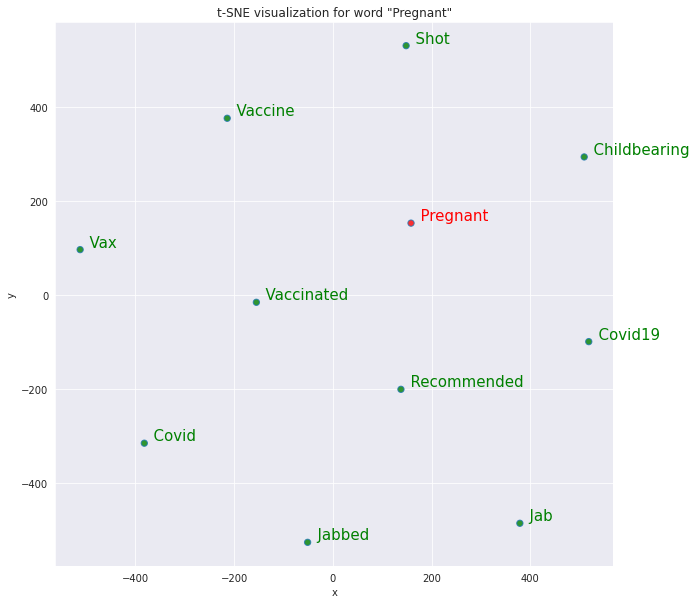

In [45]:
tsne_plot('pregnant', w2v_model)

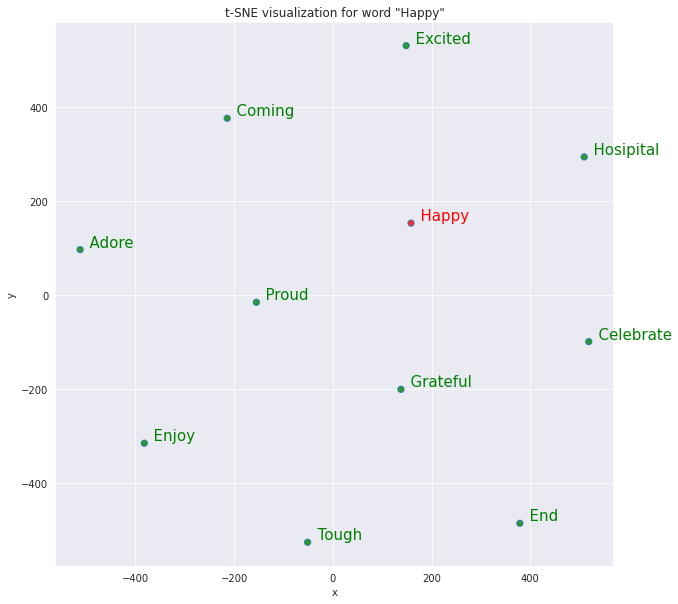

In [46]:
tsne_plot('happy', w2v_model)

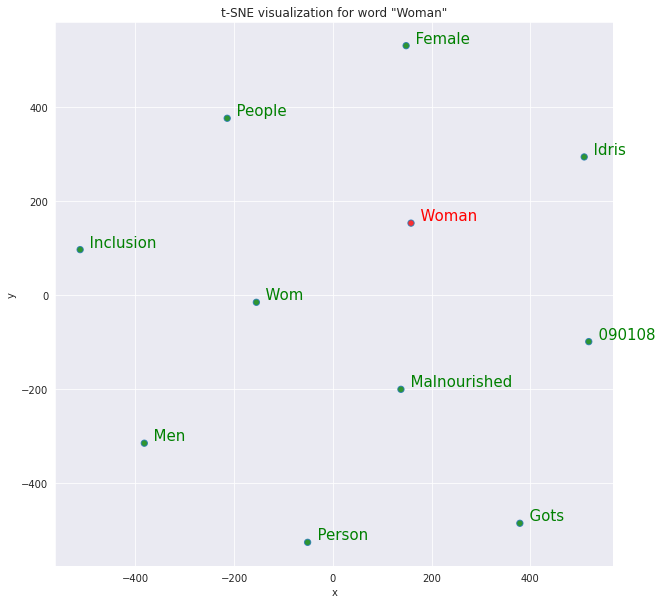

In [47]:
tsne_plot('woman', w2v_model)

# Sentiment analysis

In [48]:
words_list = []
for sentence in df['pre_text']:
    all_words = sentence.split(' ')
    for word in all_words:
        words_list.append(word)

## NLTK’s Pre-Trained Sentiment Analyzer

In [49]:
sentences_list = [sentence for sentence in df['pre_text']]

In [50]:
len(sentences_list)

74792

In [51]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

The compound score is the sum of positive, negative & neutral scores which is then normalized between -1(most extreme negative) and +1 (most extreme positive). [[ref]](https://analyticsindiamag.com/sentiment-analysis-made-easy-using-vader/)

In [52]:
def getSentimentLabel(compound_score):
    if compound_score >= 0.05:
        return 'Positive'
    elif compound_score <= -0.05:
        return 'Negative'
    else:
        return 'Neutral'

In [53]:
df = df.assign(sentiment_compound = None)
df = df.assign(sentiment_label = None)

In [54]:
# This process take up to 40 mins
# I decided to run once and save for later use
'''
for index in tqdm(df.index):
    sentence = df.at[index, 'pre_text']
    sid = SentimentIntensityAnalyzer()
    polarity = sid.polarity_scores(sentence)
    compound_score = polarity['compound']
    df.at[index, 'sentiment_compound'] = compound_score
    df.at[index, 'sentiment_label'] = getSentimentLabel(compound_score)
'''

"\nfor index in tqdm(df.index):\n    sentence = df.at[index, 'pre_text']\n    sid = SentimentIntensityAnalyzer()\n    polarity = sid.polarity_scores(sentence)\n    compound_score = polarity['compound']\n    df.at[index, 'sentiment_compound'] = compound_score\n    df.at[index, 'sentiment_label'] = getSentimentLabel(compound_score)\n"

In [55]:
#df.to_csv('./dfSentiment.csv', index = False)
df = pd.read_csv('../input/breastfeeding-wsentiment/dfSentiment.csv')

In [56]:
df.drop_duplicates(subset = 'pre_text', inplace = True)

In [57]:
df.head()

status_id                 created_at  \
0  1538941385809747968  2022-06-20 17:46:33+00:00   
1  1538941854649032705  2022-06-20 17:48:24+00:00   
2  1538942219645861892  2022-06-20 17:49:51+00:00   
3  1538942452723335169  2022-06-20 17:50:47+00:00   
4  1538942645011030016  2022-06-20 17:51:33+00:00   

                                                text display_text_width  \
0  Manic Mondays ☕\n\nFrom the 16th century onwar...                140   
1  southern softie commented on MailOnline: What ...                196   
2  MomToBe Women’s Rayon Maternity Dress/Easy Bre...                163   
3  @AlfredMwandagha Good for a breastfeeding bunn...                 33   
4  We know more about cow’s milk than human milk....                140   

  country     day                                           pre_text  \
0     NaN  Monday  manic monday from 16th century onwards charity...   
1     NaN  Monday  southern softie commented what concerning adul...   
2     NaN  Monday  momtobe woman rayon maternity dress easy breas...   
3     NaN  Monday                           good breastfeeding bunny   
4     NaN  Monday  we know cow milk human milk but new research m...   

  country_code country_flag  sentiment_compound sentiment_label  
0          NaN          NaN              0.8519        Positive  
1          NaN          NaN             -0.4939        Negative  
2          NaN          NaN              0.4404        Positive  
3          NaN          NaN              0.4404        Positive  
4          NaN          NaN              0.0000         Neutral

# Overall social mood in 'breastfeeding' tag

In [58]:
dfSentimentPie = df.groupby(['sentiment_label']).size().reset_index(name = 'size')
#dfSentimentPie.sort_values(by='size', ascending=False ,inplace=True)
fig = px.pie(dfSentimentPie, values='size', names='sentiment_label',
             title='Overall text sentiment',
             hover_data=['size'])
fig.update_traces(textposition='inside', textinfo='percent+label')
fig.show()

# Date and sentiments histogram

In [59]:
import plotly.graph_objects as go
dfSentimentHM = df.groupby(['created_at', 'sentiment_label', 'sentiment_compound']).size().reset_index(name = 'size')

fig = go.Figure(data=go.Heatmap(
                   z=dfSentimentHM['sentiment_compound'],
                   x=dfSentimentHM['created_at'],
                   y=dfSentimentHM['sentiment_label'],
                   hoverongaps = False))
fig.show()

In [60]:
import plotly.figure_factory as ff

dfHist = df.groupby(['sentiment_label', 'sentiment_compound']).size().reset_index(name = 'size')

fig = px.histogram(dfHist, x="sentiment_compound", y="size", color="sentiment_label", marginal="rug",
                   hover_data=dfHist.columns, title='Compound value and size')
fig.show()

In [61]:
#df.loc[df['pre_text'].astype(str).str.contains('gg')]

In [62]:
def getWordAvgSentiment(word):
    dfOnlyWord = df.loc[df['pre_text'].astype(str).str.contains(word)]
    dfOnlyWord.drop_duplicates(subset = 'pre_text', inplace = True)
    return dfOnlyWord['sentiment_compound'].mean()

Compute each word sentiment by average all sentence compound values which that word has appear. (Also drop duplicate text because some are spamming text)

In [63]:
def getNwordDistTable(n):
    from nltk.tokenize import word_tokenize
    
    text = " ".join(preText for preText in df['pre_text'].loc[df.pre_text.notna()])
    allWords = nltk.tokenize.word_tokenize(text)
    #allWordDist = nltk.FreqDist(w.lower() for w in allWords)
    #allWordDist = nltk.FreqDist(w for w in allWords)

    stopwords = nltk.corpus.stopwords.words('english')
    stopwords.extend(['i', 'according', '50', 'the', 'this', '29', 'ppl', 'year', '2m', 'get', 'info', '25', 'also', 'need', 'new', 'like', 'one', 'u', '3'])
    allWordExceptStopDist = nltk.FreqDist(w.lower() for w in allWords if w not in stopwords)
    
    mostFreq = allWordExceptStopDist.most_common(n)
    dfFreq = pd.DataFrame(mostFreq, columns = ['word', 'size'])
    
    ## Get word average sentiment
    wAvg_list = []
    label = []
    for word in dfFreq['word']:
        avgSent = getWordAvgSentiment(word)
        wAvg_list.append(avgSent)
        label.append(getSentimentLabel(avgSent))
    dfFreq = dfFreq.assign(avg_compound = wAvg_list, sentiment_label = label)
    
    return dfFreq

In [64]:
def getSimWordTable(word, w2v_model):
    sim_words = w2v_model.wv.most_similar(word, topn=10)
    dfSimWords = pd.DataFrame(sim_words, columns = ['word', 'similarity'])
    
    ## Get word average sentiment
    wAvg_list = []
    label = []
    for word in dfSimWords['word']:
        avgSent = getWordAvgSentiment(word)
        wAvg_list.append(avgSent)
        label.append(getSentimentLabel(avgSent))
    dfSimWords = dfSimWords.assign(avg_compound = wAvg_list, sentiment_label = label)
    return dfSimWords

In [65]:
getSimWordTable('pregnant', w2v_model)

word  similarity  avg_compound sentiment_label
0    vaccinated    0.879838      0.239662        Positive
1       vaccine    0.802677      0.243284        Positive
2           jab    0.801020      0.069681        Positive
3         covid    0.781475      0.228332        Positive
4          shot    0.776643      0.116035        Positive
5        jabbed    0.774422      0.032821         Neutral
6   recommended    0.772701      0.361715        Positive
7           vax    0.756407      0.100832        Positive
8  childbearing    0.755577      0.093715        Positive
9       covid19    0.751394      0.278365        Positive

In [66]:
getSimWordTable('pregnant', w2v_model)

word  similarity  avg_compound sentiment_label
0    vaccinated    0.879838      0.239662        Positive
1       vaccine    0.802677      0.243284        Positive
2           jab    0.801020      0.069681        Positive
3         covid    0.781475      0.228332        Positive
4          shot    0.776643      0.116035        Positive
5        jabbed    0.774422      0.032821         Neutral
6   recommended    0.772701      0.361715        Positive
7           vax    0.756407      0.100832        Positive
8  childbearing    0.755577      0.093715        Positive
9       covid19    0.751394      0.278365        Positive

In [67]:
dfPCA = getSimWordTable('pregnant', w2v_model)
features = ["similarity", "avg_compound"]

fig = px.scatter_matrix(
    dfPCA,
    dimensions=features,
    color="sentiment_label"
)
fig.update_traces(diagonal_visible=False)
fig.show()

# Most frequency words and it average sentiment

In [68]:
dfWords = getNwordDistTable(30)
dfWords.sort_values(by='size', ascending=True ,inplace=True)
fig = px.bar(dfWords, x='size', y='word',
             hover_data=['word', 'size', 'sentiment_label'], color='avg_compound',
             labels={'avg_compound':'Word Avg Sentiment'}, width=1000 ,height=600,
             title='Most Frequency Words')
fig.show()

In [69]:
dfWords.sort_values(by='size', ascending=False ,inplace=False).head(10)

word   size  avg_compound sentiment_label
0  breastfeeding  77462      0.180325        Positive
1           baby  15141      0.218207        Positive
2          woman  10704      0.090316        Positive
3         mother   7918      0.243694        Positive
4          child   5978      0.206771        Positive
5        support   5919      0.584698        Positive
6         breast   5336      0.180728        Positive
7           milk   5295      0.235193        Positive
8           week   4558      0.408028        Positive
9            mom   4458      0.255577        Positive

# Word sentiment analysis

In [70]:
dfBubble = getNwordDistTable(300)

fig = px.scatter(dfBubble, y="avg_compound", x="size",
	         size="size", color="sentiment_label",
                 hover_name="word", log_x=True)
fig.show()

In [71]:
words_list = []
for sentence in df['pre_text'].loc[df['pre_text'].notna()]:
    all_words = sentence.split(' ')
    for word in all_words:
        words_list.append(word)

textCon = nltk.Text(words_list)
#textCon.concordance('afghan', lines = 5)

In [72]:
concordance_list = textCon.concordance_list('woman', lines = 5)
for entry in concordance_list:
    print(entry.line)

ry onwards charity often represented woman shown breastfeeding child in van dyc
hameful tv chanel it turning momtobe woman rayon maternity dress easy breast fe
r naomi wolf breastfeeding 2021 2022 woman vaccinated dropped 34 mom 14 full vi
ful learn racism level juneteenth it woman problem alone enough time breastfeed
ng mummybloggers this painting young woman breastfeeding old man prison cell so


# What do people talking/caring/interesting about in some topics

# Example topic: 'Pregnant'
### Most top 10 similarity/nearest words to 'pregnant' visualized with t-SNE

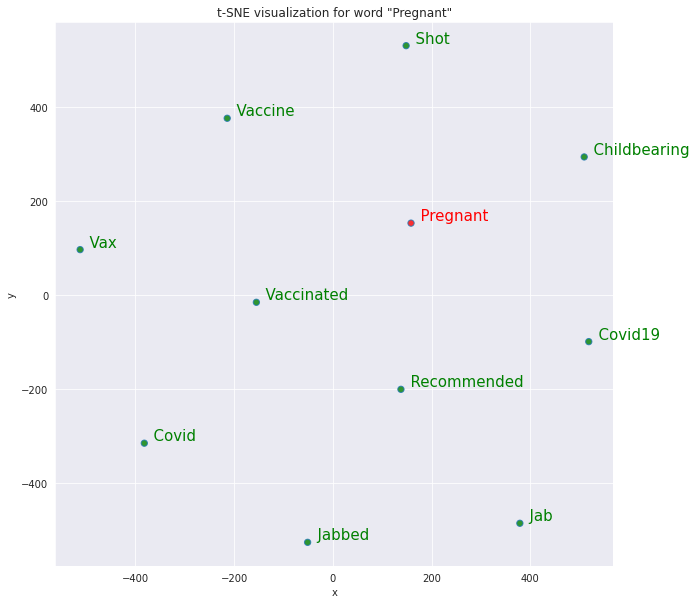

In [73]:
tsne_plot('pregnant', w2v_model)

In [74]:
dfBubbleTopic = getSimWordTable('pregnant', w2v_model)

fig = px.scatter(dfBubbleTopic, x="avg_compound", y="similarity",
	         size="similarity", color="sentiment_label",
                 hover_name="word", log_x=False)
fig.show()

In [75]:
dfBubbleTopic

word  similarity  avg_compound sentiment_label
0    vaccinated    0.879838      0.239662        Positive
1       vaccine    0.802677      0.243284        Positive
2           jab    0.801020      0.069681        Positive
3         covid    0.781475      0.228332        Positive
4          shot    0.776643      0.116035        Positive
5        jabbed    0.774422      0.032821         Neutral
6   recommended    0.772701      0.361715        Positive
7           vax    0.756407      0.100832        Positive
8  childbearing    0.755577      0.093715        Positive
9       covid19    0.751394      0.278365        Positive

In [76]:
getWordAvgSentiment('pregnant')

0.13157546042807367

Before drop all the spamming duplicate text the word 'pregnant' has an average sentiment from all texts/tweets -0.16 which is considering as 'Negative'. But after drop all duplicate spamming text, it's considering to be 'Positive' (avg sentiment is 0.13) and the most nearest words of it are mostly 'Positive' too.

# Pregnancy & Vacination | How people talking about it during July - Sep 2022

### From the visualzation above in pregnant topic, people do considering about vaccination.
### These keywords are average found to be positive from dataset.
### P.S. After some googling I found the words 'Jab' and 'Vax' can be mean a vaccination [[ref](https://www.urbandictionary.com/define.php?term=jab)]
## This surely that in the pregnant topic people do mostly focus on about the 'Vacination'

## Example some texts that people talking about vacination and pregnancy.

In [77]:
!pip install bloxs
from bloxs import B

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.2/76.2 kB 2.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... - done
  Created wheel for bloxs: filename=bloxs-1.0.2-py3-none-any.whl size=75050 sha256=4a9bf10462916a75daf00589a86c506f70b19c7dd4d738837349949731d98cca
  Stored in directory: /root/.cache/pip/wheels/30/d6/b6/78dc735be03b87e96a03a351f32eb683750d1934648d2f31c1
Successfully built bloxs


In [78]:
gg = df.loc[df['pre_text'].astype(str).str.contains('pregnant') & df['pre_text'].astype(str).str.contains('vaccinated')]
gg
#gg.loc[gg.sentiment_label == 'Positive']

status_id                 created_at  \
934     1539177876355960832  2022-06-21 09:26:16+00:00   
1550    1539287834334461954  2022-06-21 16:43:12+00:00   
5121    1539873390315446272  2022-06-23 07:30:00+00:00   
5328    1539912198289559552  2022-06-23 10:04:12+00:00   
5455    1539937922983596032  2022-06-23 11:46:26+00:00   
...                     ...                        ...   
228491  1569947967104159744  2022-09-14 07:15:38+00:00   
228966  1570998353571516417  2022-09-17 04:49:29+00:00   
234525  1571774860132749312  2022-09-19 08:15:03+00:00   
234889  1571839831122055168  2022-09-19 12:33:13+00:00   
236824  1572188224977793025  2022-09-20 11:37:37+00:00   

                                                     text display_text_width  \
934     Are you #pregnant or #breastfeeding and still ...                273   
1550    Should pregnant and breastfeeding women be vac...                278   
5121    Pregnant women are more at risk of severe #COV...                158   
5328    @DoomsdayDebunks You claim that the vaccine is...                169   
5455    Pregnant women are more at risk of severe #COV...                201   
...                                                   ...                ...   
228491  @bidoogiri @Dr_D_Robertson @chrischirp That ad...                287   
228966  Denmark has now banned covid vaccines for peop...                274   
234525  Pregnant &amp; breastfeeding mothers are also ...                273   
234889  @julieRo29047282 @JamesMelville Meanwhile I kn...                319   
236824  @mpc_xetts @JeremyVineOn5 @Doctor_Emeka In the...                288   

       country        day                                           pre_text  \
934        NaN    Tuesday  are pregnant breastfeeding still question covi...   
1550       NaN    Tuesday  should pregnant breastfeeding woman vaccinated...   
5121       NaN   Thursday  pregnant woman risk severe covid19 that import...   
5328       NaN   Thursday  you claim vaccine pushed pregnant woman also t...   
5455       NaN   Thursday  pregnant woman risk severe covid19 that import...   
...        ...        ...                                                ...   
228491     NaN  Wednesday  that advice 2020 sufficient data available mak...   
228966     NaN   Saturday  denmark banned covid vaccine people age 50 uk ...   
234525     NaN     Monday  pregnant breastfeeding mother also eligible co...   
234889     NaN     Monday  meanwhile i know 2 unvaccinated lady 1 pregnan...   
236824     NaN    Tuesday  in context supply regulation 174 considered su...   

       country_code country_flag  sentiment_compound sentiment_label  
934             NaN          NaN              0.3818        Positive  
1550            NaN          NaN             -0.6808        Negative  
5121            NaN          NaN             -0.0772        Negative  
5328            NaN          NaN              0.5574        Positive  
5455            NaN          NaN             -0.0772        Negative  
...             ...          ...                 ...             ...  
228491          NaN          NaN              0.8625        Positive  
228966          NaN          NaN             -0.3818        Negative  
234525          NaN          NaN              0.0000         Neutral  
234889          NaN          NaN             -0.1010        Negative  
236824          NaN          NaN              0.6597        Positive  

[209 rows x 11 columns]

In [79]:
B([
    B('🤰🤰🤰', df.at[2245, 'text']),
    B('✨✨✨', df.at[5328, 'text']),
    B('💉💉💉', df.at[5455, 'text'])
])

### This show that during these 3 months people on social media are mostly trying to push the pregnancy mom to get the COVID-19 vaccine.
#### Also show that most people on social media thinking of COVID-19 vaccine in possitive way.

In [80]:
# To be continue ...